<a href="https://colab.research.google.com/github/delibae/health_care_pr/blob/pr2%2Fbhj/project_3/%EB%B0%B0%ED%95%9C%EC%A7%84/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
# Charts
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
plt.rc('font', family='NanumBarunGothic') 

# Load Data

In [63]:

covid_confirmed = '/content/drive/MyDrive/data/covid/서울시 코로나19 확진자 현황.csv'
location = '/content/drive/MyDrive/data/covid/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv'

confirmed = pd.read_csv(covid_confirmed)
location = pd.read_csv(location)

In [64]:
confirmed.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [65]:
location

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


# Data Analysis

## 일별 확진자 / 지역별 확진자

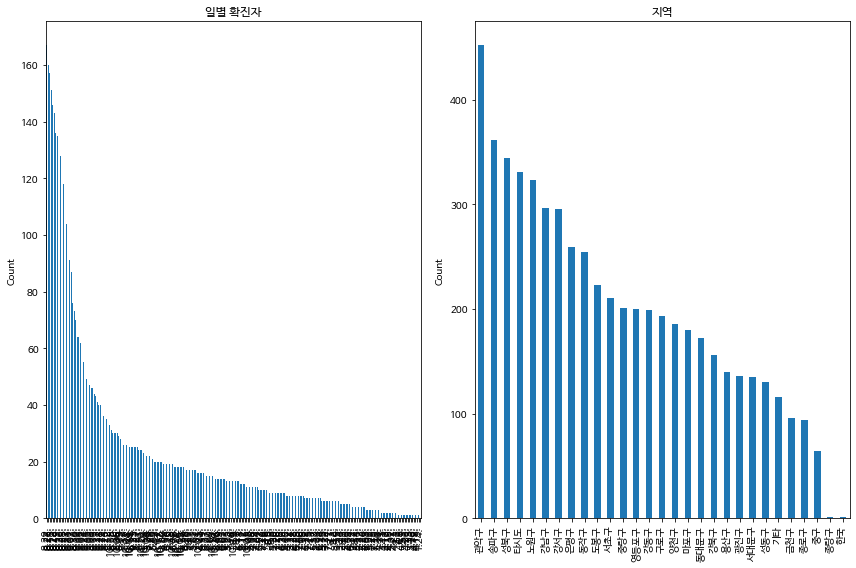

In [128]:
plt.rc('font', family='NanumBarunGothic') 
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

confirmed.확진일.value_counts(dropna=False).plot(kind='bar', ax=ax[0])
ax[0].set_ylabel('Count')
ax[0].set_title('일별 확진자')

confirmed.지역.value_counts(dropna=False).plot(kind='bar', ax=ax[1])
ax[1].set_title('지역')
ax[1].set_ylabel('Count')

# confirmed.여행력.value_counts(dropna=False).plot(kind='bar', ax=ax[1, 0])
# ax[1,0].set_title('여행력')
# ax[1,0].set_ylabel('Count')

# confirmed.접촉력.value_counts(dropna=False).plot(kind='bar', ax=ax[1,1])
# ax[1,1].set_title('조치사항')
# ax[1,1].set_ylabel('Count')

f.subplots_adjust(hspace=0.7)
f.tight_layout()
plt.show()

## chocolate map(지역별 확진자 시각화)

In [124]:
import folium
import json

In [125]:
geo_path = '/content/drive/MyDrive/data/covid/seoul_municipalities_geo_simple.json'
geo_json = json.load(open(geo_path, encoding='utf-8'))

def add1(valid):

    loc = location[location['시군구명_한글'] == valid]['경도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]
    
def add2(valid):
    loc = location[location['시군구명_한글'] == valid]['위도'].values.tolist()
    if len(loc) == 0:
      return 0
    return loc[0]

confirmed['경도'] = confirmed.apply(lambda row : add1(row['지역']), axis = 1)

confirmed['위도'] = confirmed.apply(lambda row : add2(row['지역']), axis = 1)

In [126]:
df = pd.DataFrame(confirmed.지역.value_counts(dropna=False))

df.columns = ['확진자수']

df

,확진자수
관악구,452
송파구,361
성북구,344
타시도,331
노원구,323
강남구,296
강서구,295
은평구,259
동작구,254
도봉구,223


In [127]:
map = folium.Map(location=[37.5145660680291,127.04672806823502], 
                 zoom_start=10.4)

map.choropleth(geo_data = geo_json,
               data = df['확진자수'],
               fill_color = 'BuPu',
               key_on = 'feature.properties.name',
               fill_opacity=0.7,
               line_opacity=0.2,
               highlight=True)
map

/usr/local/lib/python3.8/dist-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
